# Import Required Libraries
Import the necessary libraries, including pandas, numpy, and sklearn.

In [1]:
# Importing the required libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
from sklearn.model_selection import TimeSeriesSplit  # For time series cross-validation
from sklearn.linear_model import LinearRegression  # For the linear regression model
from sklearn.metrics import mean_squared_error  # For calculating the mean squared error
from sklearn.preprocessing import StandardScaler  # For standardizing the features
from matplotlib import pyplot as plt  # For data visualization

# Load and Explore the Dataset
Load the ACN_data.csv file into a pandas DataFrame and perform initial exploration.

In [2]:
# Load the dataset
df = pd.read_csv('individual_stocks_5yr/individual_stocks_5yr/ACN_data.csv')

# Display the first 5 rows of the DataFrame
print(df.head())

# Display the last 5 rows of the DataFrame
print(df.tail())

# Display the shape of the DataFrame
print('The shape of the DataFrame is:', df.shape)

# Display the column names
print('The column names are:', df.columns)

# Display the data types of each column
print('The data types of each column are:', df.dtypes)

# Check for missing values
print('The number of missing values in each column are:', df.isnull().sum())

# Display summary statistics
print(df.describe())

         date   open    high    low  close   volume Name
0  2013-02-08  73.01  73.710  72.82  73.31  2000477  ACN
1  2013-02-11  73.09  73.270  72.10  73.07  1880055  ACN
2  2013-02-12  72.89  73.495  72.58  73.37  1710274  ACN
3  2013-02-13  73.32  73.710  73.20  73.56  1884631  ACN
4  2013-02-14  73.21  73.500  72.66  73.13  2096346  ACN
            date     open    high     low   close   volume Name
1254  2018-02-01  160.155  161.13  159.54  160.46  1692576  ACN
1255  2018-02-02  159.980  160.27  156.63  156.90  2183611  ACN
1256  2018-02-05  156.120  159.27  150.73  151.83  3733711  ACN
1257  2018-02-06  150.290  155.18  149.43  154.69  4259634  ACN
1258  2018-02-07  154.220  158.93  153.07  155.15  2918659  ACN
The shape of the DataFrame is: (1259, 7)
The column names are: Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')
The data types of each column are: date       object
open      float64
high      float64
low       float64
close     float64
volu

# Preprocess the Data
Clean and preprocess the data as necessary for the linear regression model.

In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print('The number of missing values in each column are:', missing_values)

# If there are missing values, fill them with the mean of the respective column
if missing_values.sum() > 0:
    df.fillna(df.mean(), inplace=True)

# remove the sttock name column
df = df.drop('Name', axis=1)

#drop the date column
df = df.drop('date', axis=1)

The number of missing values in each column are: date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64


# Chunk the Data into 40-Day Periods
Divide the data into chunks of 40 days each for training the model.

In [4]:
# Create a new DataFrame to store the data in 40-day chunks
df_chunks = pd.DataFrame()

# Loop over the DataFrame in 40-day chunks
for i in range(0, df.shape[0]-44, 40):
    chunk = df.iloc[i:i+40]
    chunk = chunk.assign(target=df.iloc[i+44]['open'])

    # Use pd.concat to combine the chunks
    df_chunks = pd.concat([df_chunks, chunk])

# Reset the index of the new DataFrame
df_chunks.reset_index(drop=True, inplace=True)

# Display the first 5 rows of the new DataFrame
print(df_chunks.head())

# Display the last 5 rows of the new DataFrame
print(df_chunks.tail())

# Display the shape of the new DataFrame
print('The shape of the new DataFrame is:', df_chunks.shape)

# Display the column names of the new DataFrame
print('The column names of the new DataFrame are:', df_chunks.columns.tolist())

# Display the data types of each column of the new DataFrame
print('The data types of each column of the new DataFrame are:', df_chunks.dtypes)

# Check for missing values in the new DataFrame
print('The number of missing values in each column of the new DataFrame are:', df_chunks.isnull().sum())

# Display summary statistics of the new DataFrame
print(df_chunks.describe())

    open    high    low  close   volume  target
0  73.01  73.710  72.82  73.31  2000477   76.93
1  73.09  73.270  72.10  73.07  1880055   76.93
2  72.89  73.495  72.58  73.37  1710274   76.93
3  73.32  73.710  73.20  73.56  1884631   76.93
4  73.21  73.500  72.66  73.13  2096346   76.93
        open    high       low   close   volume  target
1235  155.00  156.86  154.7700  156.38  1777024  160.13
1236  156.61  157.72  156.1300  157.67  1597608  160.13
1237  157.37  159.01  156.8400  158.93  2616907  160.13
1238  158.50  159.49  157.4535  159.46  3204962  160.13
1239  158.95  159.15  157.7308  158.90  1624075  160.13
The shape of the new DataFrame is: (1240, 6)
The column names of the new DataFrame are: ['open', 'high', 'low', 'close', 'volume', 'target']
The data types of each column of the new DataFrame are: open      float64
high      float64
low       float64
close     float64
volume      int64
target    float64
dtype: object
The number of missing values in each column of the new Da

In [5]:
# export df_chunks to a csv file
df_chunks.to_csv('ACN_data_chunks.csv', index=False)

# Train the Linear Regression Model
Train the linear regression model using the 40-day chunks of data.

In [6]:
# Standardize the features excluding 'date'
# features_to_scale = df.columns.difference(['date'])
# scaler = StandardScaler()
# df_scaled = df_chunks.copy()
# df_scaled[features_to_scale] = scaler.fit_transform(df_chunks[features_to_scale])

# Split the data into features and target variable
X = df_chunks.drop('target', axis=1)
y = df_chunks['target']

#X = df_scaled.drop('target', axis=1)
#y = df_scaled['target']

# Initialize the TimeSeriesSplit object
tscv = TimeSeriesSplit(n_splits=5)

# Initialize the Linear Regression model
model = LinearRegression()

# Initialize a list to store the mean squared errors
mse = []

# root mean square error
rmse = []

# Loop over the time series cross-validation splits
for train_index, test_index in tscv.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate the mean squared error
    mse.append(mean_squared_error(y_test, y_pred))
    
    # Calculate the root mean squared error
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    

# Print the mean of the mean squared errors
print('The mean of the mean squared errors is:', np.mean(mse))

# Print the mean of the root mean squared errors
print('The mean of the root mean squared errors is:', np.mean(rmse))

The mean of the mean squared errors is: 43.30950045230001
The mean of the root mean squared errors is: 6.116869618705246


# Predict the 44th Day
Use the trained model to predict the 44th day based on the previous 40 days.

In [7]:
# Predict the 44th day using the trained model
# We will use the last 40 days in our dataset as input for our prediction

# Select the last 40 days
X_new = df_chunks.iloc[-40:].drop('target', axis=1)
#X_new = df_scaled.iloc[-40:].drop('target', axis=1)

# Use the model to make a prediction
y_new_pred = model.predict(X_new)

# Print the predicted value for the 44th day
print('The predicted value for the 44th day is:', y_new_pred[-1])

The predicted value for the 44th day is: 155.7918610975233


# Fine Tune the Model with More Chunks
Improve the model's performance by training it with more chunks of data.

In [8]:
# Increase the number of chunks to improve the model's performance
# Instead of using 40-day chunks, we will now use 20-day chunks

# Create a new DataFrame to store the data in 20-day chunks
df_chunks_20 = pd.DataFrame()

# Loop over the DataFrame in 20-day chunks
for i in range(0, df.shape[0]-44, 20):
    chunk = df.iloc[i:i+20]
    # Add the 44th day as the target variable for each chunk
    chunk = chunk.assign(target=df.iloc[i+44]['open'])
    df_chunks_20 = pd.concat([df_chunks_20, chunk])
        
# Reset the index of the new DataFrame
df_chunks_20.reset_index(drop=True, inplace=True)

# Split the data into features and target variable
X_20 = df_chunks_20.drop('target', axis=1)
y_20 = df_chunks_20['target']

# Initialize a list to store the mean squared errors
mse_20 = []

# calculate the root mean square error
rmse_20 = []

# Loop over the time series cross-validation splits
for train_index, test_index in tscv.split(X_20):
    # Split the data into training and testing sets
    X_train, X_test = X_20.iloc[train_index], X_20.iloc[test_index]
    y_train, y_test = y_20.iloc[train_index], y_20.iloc[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate the mean squared error
    mse_20.append(mean_squared_error(y_test, y_pred))
    
    # Calculate the root mean squared error
    rmse_20.append(np.sqrt(mean_squared_error(y_test, y_pred))) 

# Print the mean of the mean squared errors
print('The mean of the mean squared errors with 20-day chunks is:', np.mean(mse_20))

# Print the mean of the root mean squared errors
print('The mean of the root mean squared errors with 20-day chunks is:', np.mean(rmse_20))  

# Predict the 44th day using the trained model
# We will use the last 20 days in our dataset as input for our prediction

# Select the last 20 days
X_new_20 = df_chunks_20.iloc[-20:].drop('target', axis=1)

# Use the model to make a prediction
y_new_pred_20 = model.predict(X_new_20)

# Print the predicted value for the 44th day
print('The predicted value for the 44th day with 20-day chunks is:', y_new_pred_20[-1])

The mean of the mean squared errors with 20-day chunks is: 59.74932547700494
The mean of the root mean squared errors with 20-day chunks is: 7.259587505206556
The predicted value for the 44th day with 20-day chunks is: 149.28864787797514


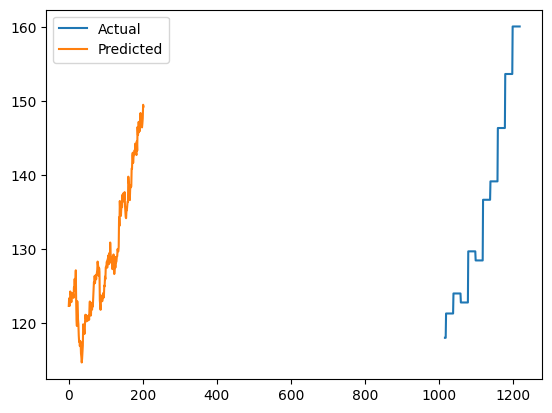

In [9]:
# plot the graph to show the actuals and the predicted values in a line graph
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()
